In [1]:
print("3A) Aplicaria um filtro passa alta")

print("3B) Questão elaborada abaixo. O resultado refere-se a visão gerada que permite a visualização somente da camada de mudança abrupta do sinal, ou seja a borda")

3A) Aplicaria um filtro passa alta
3B) Questão elaborada abaixo. O resultado refere-se a visão gerada que permite a visualização somente da camada de mudança abrupta do sinal, ou seja a borda


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp


In [3]:
#DEFININDO OS FILTROS NO DOMÍNIO DA FREQUENCIA:

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

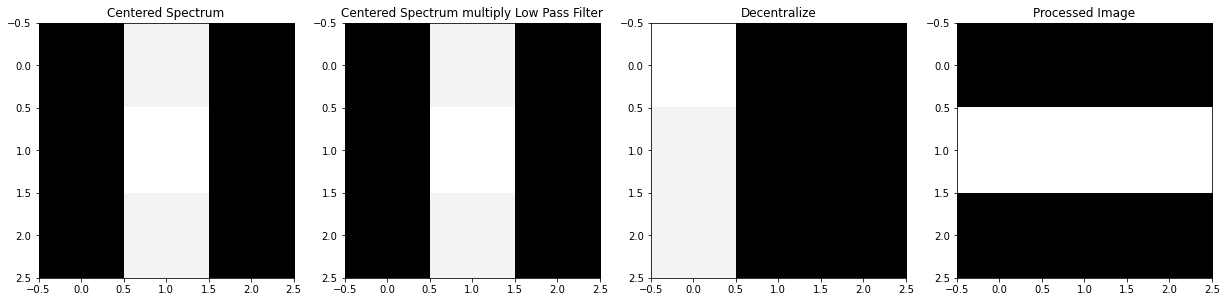

In [4]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

b = np.array([[10,10,10],[100,100,100],[10,10,10]])
resultado = np.fft.fft2(b)
plot = np.fft.fftshift(resultado)
plt.imshow(np.log(1+np.abs(plot)),"gray")


#original = resultado

#COEFICIENTES DFT2 CENTRALIZADOS
center = np.fft.fftshift(resultado)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(10,b.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

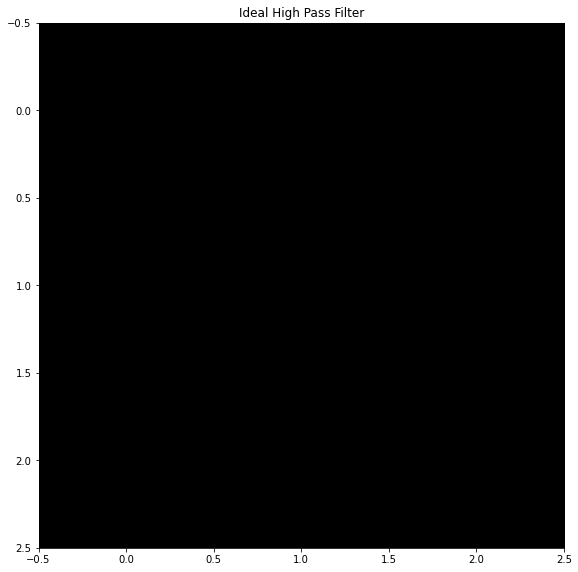

In [5]:

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)


HighPass = idealFilterHP(70,b.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()